In [1]:
%matplotlib inline
import pandas as pd
from collections import Counter
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
comprehensive = "comprehensive_dataset.csv"

dfs = pd.read_csv(comprehensive)

/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_83409/3811004337.py:3: DtypeWarning: Columns (11,12,13,14,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = pd.read_csv(comprehensive)


In [3]:
file = "frequency_of_changed_file.csv"
changed_file = pd.read_csv(file)
changed_file = changed_file.rename(columns={'model_name': 'model'})
changed_file['model_name'] = changed_file['owner'] + '/' + changed_file['model']

changed_files = changed_file[['owner', 'model', 'model_name', 'file_changed', 'file_extension', 'changed_frequency']]


changed_frequency = changed_files.groupby('model_name')['changed_frequency'].sum()

df_main = pd.merge(dfs, changed_frequency, on = 'model_name', how = 'left')

df_main

,Owner,model_name,model_link,pipeline,size,base_model,architecture,Establishment,Upload Date,Modified,...,million,commit_count,pull_count,discussion_count,model_card,dataset,Dataset,Link_ava,has_dataset,changed_frequency
0,HMehrab,HMehrab/bangla_idiom_paraphrase_v1,https://huggingface.co/HMehrab/bangla_idiom_pa...,text2text-generation,2.475348e+08,t5,T5ForConditionalGeneration,individual,2024-02-23T13:51:24.000Z,2024-02-23T14:30:23.000Z,...,247.53,7,0,0,card_found,no_dataset,No,No,No,21.0
1,namnthust,namnthust/content,https://huggingface.co/namnthust/content,question-answering,6.636442e+07,distilbert,DistilBertForQuestionAnswering,individual,2024-02-26T16:17:49.000Z,2024-02-26T17:36:15.000Z,...,66.36,4,0,0,card_found,no_dataset,No,No,No,29.0
2,caowenlei,caowenlei/finetuning-sentiment-model-3000-samples,https://huggingface.co/caowenlei/finetuning-se...,text-classification,6.695501e+07,distilbert,DistilBertForSequenceClassification,individual,2024-02-29T19:28:56.000Z,2024-02-29T22:07:18.000Z,...,66.96,4,0,0,card_found,no_dataset,No,No,No,10.0
3,argmining-vaccines,argmining-vaccines/bert-base-spanish-wwm-cased...,https://huggingface.co/argmining-vaccines/bert...,token-classification,1.092618e+08,bert,BertForTokenClassification,0rganization,2024-02-29T20:07:53.000Z,2024-02-29T20:08:28.000Z,...,109.26,2,0,0,card_found,no_dataset,No,No,No,4.0
4,mHossain,mHossain/afrikans_sum_v1,https://huggingface.co/mHossain/afrikans_sum_v1,text2text-generation,6.050662e+07,t5,T5ForConditionalGeneration,individual,2024-03-01T20:35:35.000Z,2024-03-01T21:17:05.000Z,...,60.51,7,0,0,card_found,no_dataset,No,No,No,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52222,ArianAskari,ArianAskari/SOLID-SFT-DPO-MixQV2-SOLIDRejected...,https://huggingface.co/ArianAskari/SOLID-SFT-D...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-13T00:16:03.000Z,2024-02-13T06:21:46.000Z,...,7241.73,4,1,0,card_found,['ArianAskari/SOLID'],NaN,NaN,Yes,13.0
52223,ArianAskari,ArianAskari/SOLID-SFT-WoDPO-MixQV2-Zephyr-7b-beta,https://huggingface.co/ArianAskari/SOLID-SFT-W...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-11T05:50:12.000Z,2024-02-11T13:14:49.000Z,...,7241.73,6,1,0,card_found,['ArianAskari/SOLID'],NaN,NaN,Yes,16.0
52224,ArianAskari,ArianAskari/SOLID_SFT-WoDPO-WoMixQ,https://huggingface.co/ArianAskari/SOLID_SFT-W...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-11T06:44:14.000Z,2024-02-11T13:15:09.000Z,...,7241.73,6,1,0,card_found,['ArianAskari/SOLID'],NaN,NaN,Yes,16.0
52225,ohwi,ohwi/japanese-stablelm-instruct-gamma-7b-dpo-u...,https://huggingface.co/ohwi/japanese-stablelm-...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2023-12-21T14:10:58.000Z,2023-12-23T06:53:31.000Z,...,7241.73,4,0,0,card_found,['argilla/ultrafeedback-binarized-preferences-...,NaN,NaN,Yes,12.0


In [4]:
variant = []
for index, row in df_main.iterrows():
    model_name = row["model_name"]
    
    versioning = []
    parts = model_name.split("/")
    left_part = parts[0]
    right_part = parts[1]
    init_model_name = right_part.replace("_", "-")
    name_separate = init_model_name.split("-")
    if any(substring.lower() in name_element.lower() for name_element in name_separate for substring in
           ["4bits", "4bit", "8bits", "8bit", "awq", "float32", "int8", "Int4", "ptq", "q8", "quantized", "QAT",
            "float16"]):
        versioning.append("quantized")
    elif "distilled" in [name_element.lower() for name_element in name_separate]:
        versioning.append("compressed")
    elif "deduped" in [name_element.lower() for name_element in name_separate]:
        versioning.append("deduplicated")
    elif "ft" in [name_element.lower() for name_element in name_separate]:
        versioning.append("finetuned")
    elif "finetuned" in [name_element.lower() for name_element in name_separate]:
        versioning.append("finetuned")
    else:
        versioning.append("None")
        
    variant.append([",".join(versioning)
    ])

    #print(f"Processed model at index {index} with model_name: {row['model_name']}")

columns = ["variants_types_none"]

var_prime = pd.DataFrame(variant, columns=columns)

df_main['merge_prime'] = var_prime
df_main

,Owner,model_name,model_link,pipeline,size,base_model,architecture,Establishment,Upload Date,Modified,...,commit_count,pull_count,discussion_count,model_card,dataset,Dataset,Link_ava,has_dataset,changed_frequency,merge_prime
0,HMehrab,HMehrab/bangla_idiom_paraphrase_v1,https://huggingface.co/HMehrab/bangla_idiom_pa...,text2text-generation,2.475348e+08,t5,T5ForConditionalGeneration,individual,2024-02-23T13:51:24.000Z,2024-02-23T14:30:23.000Z,...,7,0,0,card_found,no_dataset,No,No,No,21.0,None
1,namnthust,namnthust/content,https://huggingface.co/namnthust/content,question-answering,6.636442e+07,distilbert,DistilBertForQuestionAnswering,individual,2024-02-26T16:17:49.000Z,2024-02-26T17:36:15.000Z,...,4,0,0,card_found,no_dataset,No,No,No,29.0,None
2,caowenlei,caowenlei/finetuning-sentiment-model-3000-samples,https://huggingface.co/caowenlei/finetuning-se...,text-classification,6.695501e+07,distilbert,DistilBertForSequenceClassification,individual,2024-02-29T19:28:56.000Z,2024-02-29T22:07:18.000Z,...,4,0,0,card_found,no_dataset,No,No,No,10.0,None
3,argmining-vaccines,argmining-vaccines/bert-base-spanish-wwm-cased...,https://huggingface.co/argmining-vaccines/bert...,token-classification,1.092618e+08,bert,BertForTokenClassification,0rganization,2024-02-29T20:07:53.000Z,2024-02-29T20:08:28.000Z,...,2,0,0,card_found,no_dataset,No,No,No,4.0,None
4,mHossain,mHossain/afrikans_sum_v1,https://huggingface.co/mHossain/afrikans_sum_v1,text2text-generation,6.050662e+07,t5,T5ForConditionalGeneration,individual,2024-03-01T20:35:35.000Z,2024-03-01T21:17:05.000Z,...,7,0,0,card_found,no_dataset,No,No,No,23.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52222,ArianAskari,ArianAskari/SOLID-SFT-DPO-MixQV2-SOLIDRejected...,https://huggingface.co/ArianAskari/SOLID-SFT-D...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-13T00:16:03.000Z,2024-02-13T06:21:46.000Z,...,4,1,0,card_found,['ArianAskari/SOLID'],NaN,NaN,Yes,13.0,None
52223,ArianAskari,ArianAskari/SOLID-SFT-WoDPO-MixQV2-Zephyr-7b-beta,https://huggingface.co/ArianAskari/SOLID-SFT-W...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-11T05:50:12.000Z,2024-02-11T13:14:49.000Z,...,6,1,0,card_found,['ArianAskari/SOLID'],NaN,NaN,Yes,16.0,None
52224,ArianAskari,ArianAskari/SOLID_SFT-WoDPO-WoMixQ,https://huggingface.co/ArianAskari/SOLID_SFT-W...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-11T06:44:14.000Z,2024-02-11T13:15:09.000Z,...,6,1,0,card_found,['ArianAskari/SOLID'],NaN,NaN,Yes,16.0,None
52225,ohwi,ohwi/japanese-stablelm-instruct-gamma-7b-dpo-u...,https://huggingface.co/ohwi/japanese-stablelm-...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2023-12-21T14:10:58.000Z,2023-12-23T06:53:31.000Z,...,4,0,0,card_found,['argilla/ultrafeedback-binarized-preferences-...,NaN,NaN,Yes,12.0,None


In [5]:
has_variant = df_main[df_main["merge_prime"] != 'None']
has_variant

,Owner,model_name,model_link,pipeline,size,base_model,architecture,Establishment,Upload Date,Modified,...,commit_count,pull_count,discussion_count,model_card,dataset,Dataset,Link_ava,has_dataset,changed_frequency,merge_prime
13,frenkd,frenkd/distilbert-base-uncased-finetuned-squad,https://huggingface.co/frenkd/distilbert-base-...,question-answering,66364418.0,distilbert,DistilBertForQuestionAnswering,individual,2024-03-14T13:26:57.000Z,2024-03-14T16:54:03.000Z,...,5,0,0,card_found,no_dataset,No,No,No,28.0,finetuned
17,xuerongkun,xuerongkun/distilbert-base-uncased_emotion_ft_...,https://huggingface.co/xuerongkun/distilbert-b...,text-classification,66958086.0,distilbert,DistilBertForSequenceClassification,individual,2023-12-17T10:29:24.000Z,2023-12-17T11:08:00.000Z,...,4,0,0,card_found,no_dataset,No,No,No,13.0,finetuned
18,hyunjerry,hyunjerry/distilbert-base-uncased-finetuned-squad,https://huggingface.co/hyunjerry/distilbert-ba...,question-answering,66364418.0,distilbert,DistilBertForQuestionAnswering,individual,2023-12-24T06:08:15.000Z,2024-01-10T16:15:26.000Z,...,20,0,0,card_found,no_dataset,No,No,No,47.0,finetuned
20,weihlai,weihlai/distilbert-base-uncased-finetuned-squad,https://huggingface.co/weihlai/distilbert-base...,question-answering,66364418.0,distilbert,DistilBertForQuestionAnswering,individual,2023-12-31T16:36:14.000Z,2024-01-02T17:37:47.000Z,...,76,0,0,card_found,no_dataset,No,No,No,158.0,finetuned
21,cicimen,cicimen/xlm-roberta-base-finetuned-panx-de,https://huggingface.co/cicimen/xlm-roberta-bas...,token-classification,277458439.0,xlm-roberta,XLMRobertaForTokenClassification,individual,2024-01-01T17:26:06.000Z,2024-01-02T20:36:57.000Z,...,4,0,0,card_found,no_dataset,No,No,No,35.0,finetuned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52177,sarahmiller137,sarahmiller137/BiomedNLP-PubMedBERT-base-uncas...,https://huggingface.co/sarahmiller137/BiomedNL...,token-classification,108894467.0,bert,BertForTokenClassification,individual,2022-08-22T16:06:00.000Z,2023-03-23T15:57:02.000Z,...,14,1,0,card_found,['ncbi_disease'],NaN,NaN,Yes,16.0,finetuned
52178,sarahmiller137,sarahmiller137/BiomedNLP-PubMedBERT-base-uncas...,https://huggingface.co/sarahmiller137/BiomedNL...,token-classification,108894467.0,bert,BertForTokenClassification,individual,2022-08-22T15:28:52.000Z,2023-03-23T15:56:40.000Z,...,16,1,0,card_found,['ncbi_disease'],NaN,NaN,Yes,18.0,finetuned
52179,sarahmiller137,sarahmiller137/distilbert-base-uncased-ft-m3-lc,https://huggingface.co/sarahmiller137/distilbe...,text-classification,66955010.0,distilbert,DistilBertForSequenceClassification,individual,2022-06-30T11:05:13.000Z,2023-06-07T17:39:39.000Z,...,8,1,0,card_found,['MIMIC-III'],NaN,NaN,Yes,13.0,finetuned
52184,Addedk,Addedk/mbert-swedish-distilled-cased,https://huggingface.co/Addedk/mbert-swedish-di...,fill-mask,135447803.0,bert,BertForMaskedLM,individual,2022-06-15T12:22:20.000Z,2023-09-13T17:57:54.000Z,...,19,3,0,card_found,['KBLab/sucx3_ner'],NaN,NaN,Yes,21.0,compressed


In [6]:
var = len(has_variant)
all_data = len(df_main)

per = (var/all_data)*100
per

16.675282899649606

In [7]:
owner_var = has_variant.groupby('Owner')['model_name'].nunique()
owner_all = df_main.groupby('Owner')['model_name'].nunique()

owner_per = (len(owner_var)/len(owner_all))*100
owner_per

22.192572826328664

In [8]:
len(owner_all)

13491

In [9]:
# Define a function to map base_model values to corresponding names
def map_model_name(base_model):
    model_names = {
        'llama': 'Llama',
        'bert': 'Bert',
        'distilbert': 'Distilbert',
        'mistral': 'Mistral',
        't5': 'T5',
        'gpt2': 'GPT-2',
        'roberta': 'RoBERTa',
        'xlm-roberta': 'XLM-RoBERTa',
        'bart': 'Bart',
        'gemma': 'Gemma',
        'mixtral': 'Mixtral',
        'marian': 'Marian',
        'phi': 'Phi',
        'mt5': 'MT5',
        'gpt_neox': 'GPT-NeoX'
    }
    # Return the corresponding name if it exists, otherwise 'Others'
    return model_names.get(base_model, 'Others')

# Apply the function to create a new column 'Model Name'
df_main['model_group'] = df_main['base_model'].apply(map_model_name)

# Display the updated DataFrame
df_main

,Owner,model_name,model_link,pipeline,size,base_model,architecture,Establishment,Upload Date,Modified,...,pull_count,discussion_count,model_card,dataset,Dataset,Link_ava,has_dataset,changed_frequency,merge_prime,model_group
0,HMehrab,HMehrab/bangla_idiom_paraphrase_v1,https://huggingface.co/HMehrab/bangla_idiom_pa...,text2text-generation,2.475348e+08,t5,T5ForConditionalGeneration,individual,2024-02-23T13:51:24.000Z,2024-02-23T14:30:23.000Z,...,0,0,card_found,no_dataset,No,No,No,21.0,None,T5
1,namnthust,namnthust/content,https://huggingface.co/namnthust/content,question-answering,6.636442e+07,distilbert,DistilBertForQuestionAnswering,individual,2024-02-26T16:17:49.000Z,2024-02-26T17:36:15.000Z,...,0,0,card_found,no_dataset,No,No,No,29.0,None,Distilbert
2,caowenlei,caowenlei/finetuning-sentiment-model-3000-samples,https://huggingface.co/caowenlei/finetuning-se...,text-classification,6.695501e+07,distilbert,DistilBertForSequenceClassification,individual,2024-02-29T19:28:56.000Z,2024-02-29T22:07:18.000Z,...,0,0,card_found,no_dataset,No,No,No,10.0,None,Distilbert
3,argmining-vaccines,argmining-vaccines/bert-base-spanish-wwm-cased...,https://huggingface.co/argmining-vaccines/bert...,token-classification,1.092618e+08,bert,BertForTokenClassification,0rganization,2024-02-29T20:07:53.000Z,2024-02-29T20:08:28.000Z,...,0,0,card_found,no_dataset,No,No,No,4.0,None,Bert
4,mHossain,mHossain/afrikans_sum_v1,https://huggingface.co/mHossain/afrikans_sum_v1,text2text-generation,6.050662e+07,t5,T5ForConditionalGeneration,individual,2024-03-01T20:35:35.000Z,2024-03-01T21:17:05.000Z,...,0,0,card_found,no_dataset,No,No,No,23.0,None,T5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52222,ArianAskari,ArianAskari/SOLID-SFT-DPO-MixQV2-SOLIDRejected...,https://huggingface.co/ArianAskari/SOLID-SFT-D...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-13T00:16:03.000Z,2024-02-13T06:21:46.000Z,...,1,0,card_found,['ArianAskari/SOLID'],NaN,NaN,Yes,13.0,None,Mistral
52223,ArianAskari,ArianAskari/SOLID-SFT-WoDPO-MixQV2-Zephyr-7b-beta,https://huggingface.co/ArianAskari/SOLID-SFT-W...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-11T05:50:12.000Z,2024-02-11T13:14:49.000Z,...,1,0,card_found,['ArianAskari/SOLID'],NaN,NaN,Yes,16.0,None,Mistral
52224,ArianAskari,ArianAskari/SOLID_SFT-WoDPO-WoMixQ,https://huggingface.co/ArianAskari/SOLID_SFT-W...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-11T06:44:14.000Z,2024-02-11T13:15:09.000Z,...,1,0,card_found,['ArianAskari/SOLID'],NaN,NaN,Yes,16.0,None,Mistral
52225,ohwi,ohwi/japanese-stablelm-instruct-gamma-7b-dpo-u...,https://huggingface.co/ohwi/japanese-stablelm-...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2023-12-21T14:10:58.000Z,2023-12-23T06:53:31.000Z,...,0,0,card_found,['argilla/ultrafeedback-binarized-preferences-...,NaN,NaN,Yes,12.0,None,Mistral


In [10]:
df_main['download'] = pd.to_numeric(df_main['download'], errors='coerce')

# Filter out rows where 'download' is not numeric and not 'deleted'
without_delete = df_main[(df_main['download'].notnull()) & (df_main['download'] != 'deleted')]

# Group by 'base_model' and sum 'download' values
down = without_delete.groupby('base_model')['download'].mean()

sorted_down = down.sort_values(ascending=False)

#sorted_down[sorted_down>1.357750e+03]

sorted_down.describe()

count    2.990000e+02
mean     1.322776e+04
std      1.559510e+05
min      1.000000e+00
25%      1.025000e+01
50%      1.060000e+02
75%      1.357750e+03
max      2.667961e+06
Name: download, dtype: float64

In [11]:
release_base = df_main.groupby('base_model')['model_name'].nunique()

df_main['download'] = pd.to_numeric(df_main['download'], errors='coerce')

# Filter out rows where 'download' is not numeric and not 'deleted'
without_delete = df_main[(df_main['download'].notnull()) & (df_main['download'] != 'deleted')]

# Group by 'base_model' and sum 'download' values
down = without_delete.groupby('base_model')['download'].mean()

average_interest = release_base
sorted_down = average_interest.sort_values(ascending=False)
sorted_down.head(15)

base_model
llama          10207
bert            7198
mistral         6326
distilbert      4275
gpt2            3675
t5              3344
roberta         2679
xlm-roberta     2129
gemma           1183
mixtral          866
bart             778
gpt_neox         760
deberta-v2       675
opt              548
marian           545
Name: model_name, dtype: int64

In [12]:
from datetime import datetime
import pytz

df_main_deleted = df_main[df_main["Upload Date"] != 'deleted']

remove_others_prime = df_main_deleted[df_main_deleted["model_group"] != 'Others']

target_date = datetime(2024, 3, 17, tzinfo=pytz.UTC)

ghty = remove_others_prime.groupby("base_model").agg({
    "model_name": 'nunique',
    "Owner" : 'nunique',
    "Upload Date": lambda x: sorted(x.unique())
}).reset_index()

# Create a new column and assign the first item from the sorted list of "Upload Date"
ghty['oldest_model'] = ghty['Upload Date'].apply(lambda x: x[1] if len(x) > 0 else None)
#ghty['oldest_model'] = ghty['Upload Date'].apply(lambda x: x[-1] if len(x) > 0 else None)

ghty['oldest_model'] = pd.to_datetime(ghty['oldest_model'])

ghty['age'] = (target_date - pd.to_datetime(ghty['oldest_model'])).dt.days

ghty['prevalent'] =ghty['model_name']/ghty['age']
ghty['prevalent'] = ghty['model_name'] / ghty['age']
ghty['owner_prevalent'] =  ghty['model_name'] / ghty['Owner']


#remove_others_prime
ghty

,base_model,model_name,Owner,Upload Date,oldest_model,age,prevalent,owner_prevalent
0,bart,778,378,"[2022-03-02T23:29:04.000Z, 2022-03-02T23:29:05...",2022-03-02 23:29:05+00:00,745,1.044295,2.058201
1,bert,7198,2576,"[2022-03-02T23:29:04.000Z, 2022-03-02T23:29:05...",2022-03-02 23:29:05+00:00,745,9.661745,2.794255
2,distilbert,4275,2229,"[2022-03-02T23:29:04.000Z, 2022-03-02T23:29:05...",2022-03-02 23:29:05+00:00,745,5.738255,1.917900
3,gemma,1150,342,"[2024-02-21T13:57:06.000Z, 2024-02-21T14:00:41...",2024-02-21 14:00:41+00:00,24,47.916667,3.362573
4,gpt2,3674,1261,"[2022-03-02T23:29:04.000Z, 2022-03-02T23:29:05...",2022-03-02 23:29:05+00:00,745,4.931544,2.913561
5,gpt_neox,760,227,"[2022-04-07T20:28:29.000Z, 2022-08-31T05:58:25...",2022-08-31 05:58:25+00:00,563,1.349911,3.348018
6,llama,10162,2772,"[2023-03-06T23:56:00.000Z, 2023-03-17T06:01:23...",2023-03-17 06:01:23+00:00,365,27.841096,3.665945
7,marian,545,249,"[2022-03-02T23:29:04.000Z, 2022-03-02T23:29:05...",2022-03-02 23:29:05+00:00,745,0.731544,2.188755
8,mistral,6313,1730,"[2023-09-20T13:03:50.000Z, 2023-09-27T14:31:52...",2023-09-27 14:31:52+00:00,171,36.918129,3.649133
9,mixtral,865,311,"[2023-12-01T09:42:00.000Z, 2023-12-10T18:47:12...",2023-12-10 18:47:12+00:00,97,8.917526,2.781350


In [13]:
df_wo_deleted = df_main[(df_main["Upload Date"] != 'deleted') & (df_main["merge_prime"] != 'None')]
df_wo_deleted

,Owner,model_name,model_link,pipeline,size,base_model,architecture,Establishment,Upload Date,Modified,...,pull_count,discussion_count,model_card,dataset,Dataset,Link_ava,has_dataset,changed_frequency,merge_prime,model_group
13,frenkd,frenkd/distilbert-base-uncased-finetuned-squad,https://huggingface.co/frenkd/distilbert-base-...,question-answering,66364418.0,distilbert,DistilBertForQuestionAnswering,individual,2024-03-14T13:26:57.000Z,2024-03-14T16:54:03.000Z,...,0,0,card_found,no_dataset,No,No,No,28.0,finetuned,Distilbert
17,xuerongkun,xuerongkun/distilbert-base-uncased_emotion_ft_...,https://huggingface.co/xuerongkun/distilbert-b...,text-classification,66958086.0,distilbert,DistilBertForSequenceClassification,individual,2023-12-17T10:29:24.000Z,2023-12-17T11:08:00.000Z,...,0,0,card_found,no_dataset,No,No,No,13.0,finetuned,Distilbert
18,hyunjerry,hyunjerry/distilbert-base-uncased-finetuned-squad,https://huggingface.co/hyunjerry/distilbert-ba...,question-answering,66364418.0,distilbert,DistilBertForQuestionAnswering,individual,2023-12-24T06:08:15.000Z,2024-01-10T16:15:26.000Z,...,0,0,card_found,no_dataset,No,No,No,47.0,finetuned,Distilbert
20,weihlai,weihlai/distilbert-base-uncased-finetuned-squad,https://huggingface.co/weihlai/distilbert-base...,question-answering,66364418.0,distilbert,DistilBertForQuestionAnswering,individual,2023-12-31T16:36:14.000Z,2024-01-02T17:37:47.000Z,...,0,0,card_found,no_dataset,No,No,No,158.0,finetuned,Distilbert
21,cicimen,cicimen/xlm-roberta-base-finetuned-panx-de,https://huggingface.co/cicimen/xlm-roberta-bas...,token-classification,277458439.0,xlm-roberta,XLMRobertaForTokenClassification,individual,2024-01-01T17:26:06.000Z,2024-01-02T20:36:57.000Z,...,0,0,card_found,no_dataset,No,No,No,35.0,finetuned,XLM-RoBERTa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52177,sarahmiller137,sarahmiller137/BiomedNLP-PubMedBERT-base-uncas...,https://huggingface.co/sarahmiller137/BiomedNL...,token-classification,108894467.0,bert,BertForTokenClassification,individual,2022-08-22T16:06:00.000Z,2023-03-23T15:57:02.000Z,...,1,0,card_found,['ncbi_disease'],NaN,NaN,Yes,16.0,finetuned,Bert
52178,sarahmiller137,sarahmiller137/BiomedNLP-PubMedBERT-base-uncas...,https://huggingface.co/sarahmiller137/BiomedNL...,token-classification,108894467.0,bert,BertForTokenClassification,individual,2022-08-22T15:28:52.000Z,2023-03-23T15:56:40.000Z,...,1,0,card_found,['ncbi_disease'],NaN,NaN,Yes,18.0,finetuned,Bert
52179,sarahmiller137,sarahmiller137/distilbert-base-uncased-ft-m3-lc,https://huggingface.co/sarahmiller137/distilbe...,text-classification,66955010.0,distilbert,DistilBertForSequenceClassification,individual,2022-06-30T11:05:13.000Z,2023-06-07T17:39:39.000Z,...,1,0,card_found,['MIMIC-III'],NaN,NaN,Yes,13.0,finetuned,Distilbert
52184,Addedk,Addedk/mbert-swedish-distilled-cased,https://huggingface.co/Addedk/mbert-swedish-di...,fill-mask,135447803.0,bert,BertForMaskedLM,individual,2022-06-15T12:22:20.000Z,2023-09-13T17:57:54.000Z,...,3,0,card_found,['KBLab/sucx3_ner'],NaN,NaN,Yes,21.0,compressed,Bert


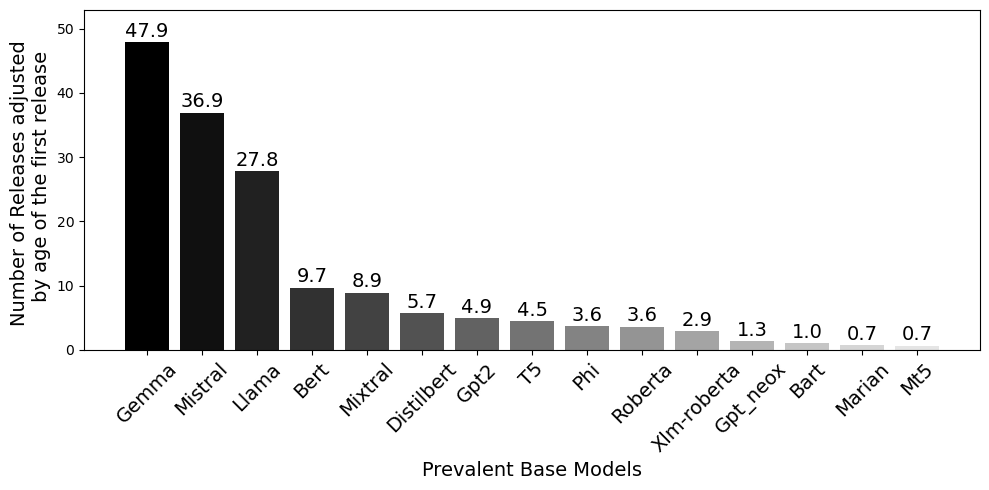

In [14]:
import numpy as np
import matplotlib.pyplot as plt

release_age = ghty.groupby('base_model')['prevalent'].mean()
age_sorted = release_age.sort_values(ascending=False)
#age_sorted

num_bars = len(age_sorted)
alphas = np.linspace(0.1, 1, num_bars)
black_colors = [(0, 0, 0, alpha) for alpha in alphas[::-1]]

plt.figure(figsize=(10, 5))
bars = plt.bar(range(len(age_sorted)), age_sorted, color=black_colors)
plt.xlabel('Prevalent Base Models', fontsize=14)  # Set font size for x-axis label
plt.ylabel('Number of Releases adjusted \n by age of the first release', fontsize=14)  # Set font size for y-axis label
#plt.xticks(range(len(age_sorted)), Capitalize(age_sorted.index), rotation=45, fontsize=14)
plt.xticks(range(len(age_sorted)), [label.capitalize() for label in age_sorted.index], rotation=45, fontsize=14)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, '{:.1f}'.format(height), ha='center', va='bottom', fontsize=14)

# Adjust y-axis limits to create space at the top
plt.ylim(0, max(age_sorted) + 5)
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.savefig("RQ2.1_all_base.pdf")
plt.show()

/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_83409/2023499842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_deleted['merge_prime'] = df_wo_deleted['merge_prime'].str.capitalize()
/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_83409/2023499842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_deleted['merge_prime'].replace("Compressed", "Distilled", inplace=True)


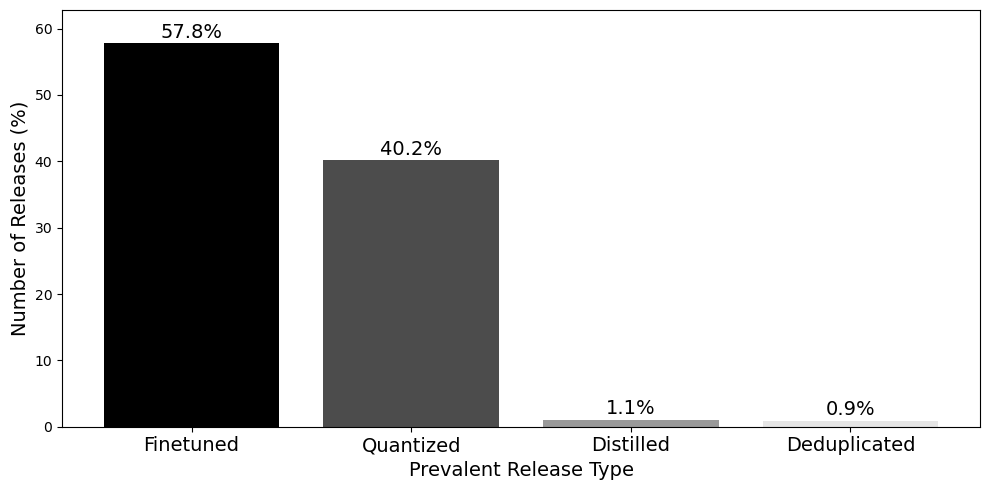

In [15]:
df_wo_deleted['merge_prime'] = df_wo_deleted['merge_prime'].str.capitalize()
df_wo_deleted['merge_prime'].replace("Compressed", "Distilled", inplace=True)

variant_type = df_wo_deleted.groupby('merge_prime')['model_name'].nunique()
variant_sorted = variant_type.sort_values(ascending=False)
all_release = sum(variant_sorted)

# Calculate percentages
var_percentages = (variant_sorted / all_release) * 100

num_bars = len(variant_sorted)
alphas = np.linspace(0.1, 1, num_bars)
black_colors = [(0, 0, 0, alpha) for alpha in alphas[::-1]]

plt.figure(figsize=(10, 5))
bars = plt.bar(range(len(variant_sorted)), var_percentages, color=black_colors)
plt.xlabel('Prevalent Release Type', fontsize=14)  # Set font size for x-axis label
plt.ylabel('Number of Releases (%)', fontsize=14)  # Set font size for y-axis label
plt.xticks(range(len(variant_sorted)), variant_sorted.index, rotation=0, fontsize=14)  # Set font size for x-axis ticks
#plt.xticks(range(len(variant_sorted)), [label.capitalize() for label in variant_sorted.index], rotation=0, fontsize=14)


# Add percentage labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, '{:.1f}%'.format(height), ha='center', va='bottom', fontsize=14)

# Adjust y-axis limits to create space at the top
plt.ylim(0, max(var_percentages) + 5)
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.savefig("distribution_of_base_variants.pdf")
plt.show()

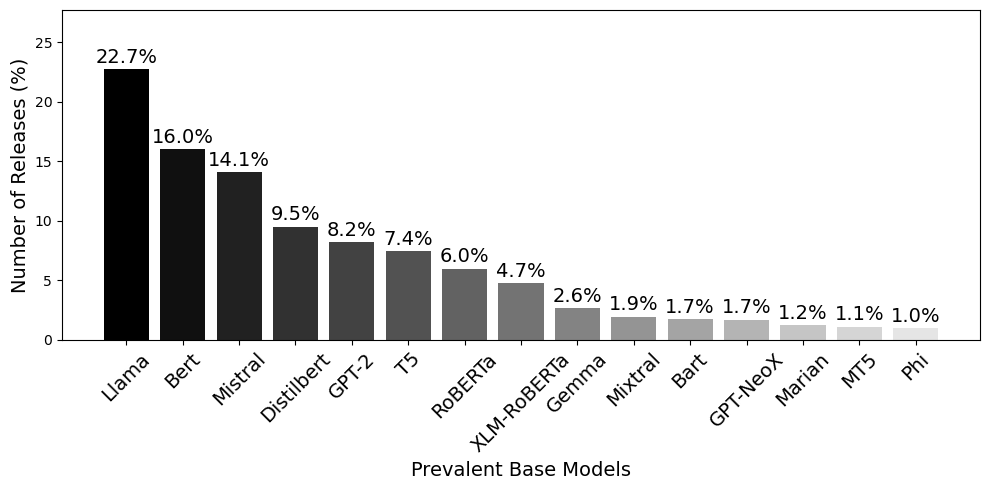

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Remove 'Others' from the model_group
remove_others = df_main[df_main["model_group"] != 'Others']

# Calculate the number of unique model names per model group
release_base = remove_others.groupby('model_group')['model_name'].nunique()
release_sorted = release_base.sort_values(ascending=False)
total_release = sum(release_base)

# Calculate percentages
percentages = (release_sorted / total_release) * 100

num_bars = len(release_sorted)
alphas = np.linspace(0.1, 1, num_bars)
black_colors = [(0, 0, 0, alpha) for alpha in alphas[::-1]]

plt.figure(figsize=(10, 5))
bars = plt.bar(range(len(release_sorted)), percentages, color=black_colors)
plt.xlabel('Prevalent Base Models', fontsize=14)  # Set font size for x-axis label
plt.ylabel('Number of Releases (%)', fontsize=14)  # Set font size for y-axis label
plt.xticks(range(len(release_sorted)), release_sorted.index, rotation=45, fontsize=14)  # Set font size for x-axis ticks

# Add percentage labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, '{:.1f}%'.format(height), ha='center', va='bottom', fontsize=14)

# Adjust y-axis limits to create space at the top
plt.ylim(0, max(percentages) + 5)
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.savefig("RQ2.1_all_base.pdf")
plt.show()


In [19]:
remove_others

,Owner,model_name,model_link,pipeline,size,base_model,architecture,Establishment,Upload Date,Modified,...,pull_count,discussion_count,model_card,dataset,Dataset,Link_ava,has_dataset,changed_frequency,merge_prime,model_group
0,HMehrab,HMehrab/bangla_idiom_paraphrase_v1,https://huggingface.co/HMehrab/bangla_idiom_pa...,text2text-generation,2.475348e+08,t5,T5ForConditionalGeneration,individual,2024-02-23T13:51:24.000Z,2024-02-23T14:30:23.000Z,...,0,0,card_found,no_dataset,No,No,No,21.0,None,T5
1,namnthust,namnthust/content,https://huggingface.co/namnthust/content,question-answering,6.636442e+07,distilbert,DistilBertForQuestionAnswering,individual,2024-02-26T16:17:49.000Z,2024-02-26T17:36:15.000Z,...,0,0,card_found,no_dataset,No,No,No,29.0,None,Distilbert
2,caowenlei,caowenlei/finetuning-sentiment-model-3000-samples,https://huggingface.co/caowenlei/finetuning-se...,text-classification,6.695501e+07,distilbert,DistilBertForSequenceClassification,individual,2024-02-29T19:28:56.000Z,2024-02-29T22:07:18.000Z,...,0,0,card_found,no_dataset,No,No,No,10.0,None,Distilbert
3,argmining-vaccines,argmining-vaccines/bert-base-spanish-wwm-cased...,https://huggingface.co/argmining-vaccines/bert...,token-classification,1.092618e+08,bert,BertForTokenClassification,0rganization,2024-02-29T20:07:53.000Z,2024-02-29T20:08:28.000Z,...,0,0,card_found,no_dataset,No,No,No,4.0,None,Bert
4,mHossain,mHossain/afrikans_sum_v1,https://huggingface.co/mHossain/afrikans_sum_v1,text2text-generation,6.050662e+07,t5,T5ForConditionalGeneration,individual,2024-03-01T20:35:35.000Z,2024-03-01T21:17:05.000Z,...,0,0,card_found,no_dataset,No,No,No,23.0,None,T5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52222,ArianAskari,ArianAskari/SOLID-SFT-DPO-MixQV2-SOLIDRejected...,https://huggingface.co/ArianAskari/SOLID-SFT-D...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-13T00:16:03.000Z,2024-02-13T06:21:46.000Z,...,1,0,card_found,['ArianAskari/SOLID'],NaN,NaN,Yes,13.0,None,Mistral
52223,ArianAskari,ArianAskari/SOLID-SFT-WoDPO-MixQV2-Zephyr-7b-beta,https://huggingface.co/ArianAskari/SOLID-SFT-W...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-11T05:50:12.000Z,2024-02-11T13:14:49.000Z,...,1,0,card_found,['ArianAskari/SOLID'],NaN,NaN,Yes,16.0,None,Mistral
52224,ArianAskari,ArianAskari/SOLID_SFT-WoDPO-WoMixQ,https://huggingface.co/ArianAskari/SOLID_SFT-W...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-11T06:44:14.000Z,2024-02-11T13:15:09.000Z,...,1,0,card_found,['ArianAskari/SOLID'],NaN,NaN,Yes,16.0,None,Mistral
52225,ohwi,ohwi/japanese-stablelm-instruct-gamma-7b-dpo-u...,https://huggingface.co/ohwi/japanese-stablelm-...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2023-12-21T14:10:58.000Z,2023-12-23T06:53:31.000Z,...,0,0,card_found,['argilla/ultrafeedback-binarized-preferences-...,NaN,NaN,Yes,12.0,None,Mistral


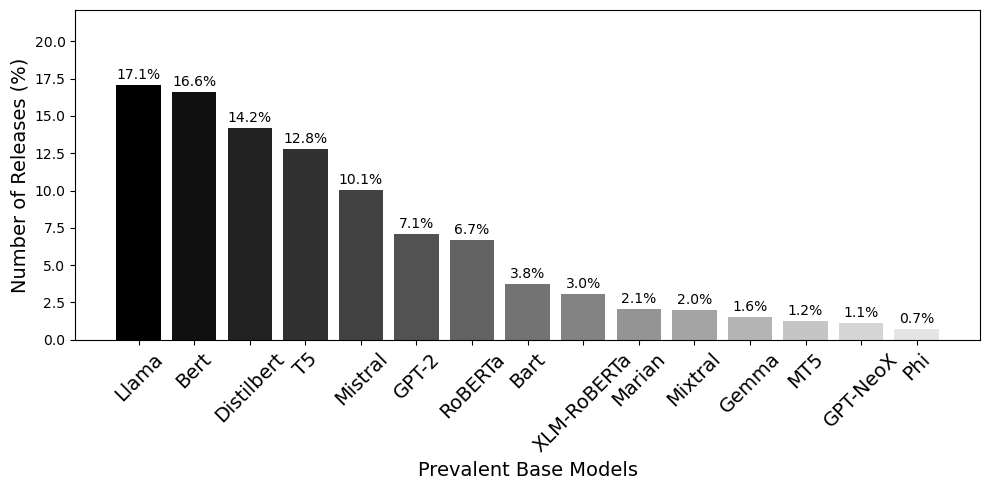

In [20]:
import numpy as np
import matplotlib.pyplot as plt

#df_without_none_variant = for_del[for_del['merge_prime'] != "None"]

remove_others = df_main[df_main["model_group"] != "Others"]

A = remove_others.groupby('model_group')['changed_frequency'].sum()
B = remove_others.groupby('model_group')['model_name'].nunique()
release_base = A+B
release_sorted = release_base.sort_values(ascending=False)
total_release = sum(release_base)

percentages = (release_sorted / total_release) * 100  # Calculate percentages

num_bars = len(release_sorted)
alphas = np.linspace(0.1, 1, num_bars)
black_colors = [(0, 0, 0, alpha) for alpha in alphas[::-1]]

plt.figure(figsize=(10, 5))
bars = plt.bar(range(len(release_sorted)), percentages, color=black_colors)
#plt.title('Percentage of Model Names by Model Group')
plt.xlabel('Prevalent Base Models', fontsize=14)
plt.ylabel('Number of Releases (%)', fontsize=14)
plt.xticks(range(len(release_sorted)), release_sorted.index, rotation=45, fontsize=14)

# Add percentage labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, '{:.1f}%'.format(height), ha='center', va='bottom')

# Adjust y-axis limits to create space at the top
plt.ylim(0, max(percentages) + 5)
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.savefig("RQ2.1_all_base.pdf")
plt.show()


In [ ]:
all_base = df_main.groupby('base_model')['model_name'].nunique()
all_base

In [21]:
for_del = df_main[df_main["Upload Date"] != 'deleted']
for_del['upload'] = pd.to_datetime(for_del['Upload Date'])
for_del['year'] = for_del['upload'].dt.year
for_del['month'] = for_del['upload'].dt.month

# Define a function to map each year-month combination to its respective segment
def map_year_month_to_segment(year, month):
    if year == 2022:
        if month <= 4:
            return 4
        elif month <= 8:
            return 8
        else:
            return 12
    elif year == 2023:
        if month <= 4:
            return 16
        elif month <= 8:
            return 20
        else:
            return 24
    elif year == 2024:
        if month <= 4:
            return 28
        elif month <= 8:
            return 32
        else:
            return 36
    else:
        return None

# Apply the function to create the 'segment' column
for_del['segments'] = for_del.apply(lambda row: map_year_month_to_segment(row['year'], row['month']), axis=1)
for_del['has_dataset'].replace({"Yes": "Has_Dataset", "No": "No_Dataset"}, inplace=True)

# Apply the function to create the 'segments' column
#df_comprehensive['segments'] = df_comprehensive['year'].apply(map_year_to_segment)

# Explode the 'segments' list into separate rows
#df_comprehensive = df_comprehensive.explode('segments')

for_del

/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_83409/313634429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_del['upload'] = pd.to_datetime(for_del['Upload Date'])
/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_83409/313634429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_del['year'] = for_del['upload'].dt.year
/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_83409/313634429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,Owner,model_name,model_link,pipeline,size,base_model,architecture,Establishment,Upload Date,Modified,...,Dataset,Link_ava,has_dataset,changed_frequency,merge_prime,model_group,upload,year,month,segments
0,HMehrab,HMehrab/bangla_idiom_paraphrase_v1,https://huggingface.co/HMehrab/bangla_idiom_pa...,text2text-generation,2.475348e+08,t5,T5ForConditionalGeneration,individual,2024-02-23T13:51:24.000Z,2024-02-23T14:30:23.000Z,...,No,No,No_Dataset,21.0,None,T5,2024-02-23 13:51:24+00:00,2024,2,28
1,namnthust,namnthust/content,https://huggingface.co/namnthust/content,question-answering,6.636442e+07,distilbert,DistilBertForQuestionAnswering,individual,2024-02-26T16:17:49.000Z,2024-02-26T17:36:15.000Z,...,No,No,No_Dataset,29.0,None,Distilbert,2024-02-26 16:17:49+00:00,2024,2,28
2,caowenlei,caowenlei/finetuning-sentiment-model-3000-samples,https://huggingface.co/caowenlei/finetuning-se...,text-classification,6.695501e+07,distilbert,DistilBertForSequenceClassification,individual,2024-02-29T19:28:56.000Z,2024-02-29T22:07:18.000Z,...,No,No,No_Dataset,10.0,None,Distilbert,2024-02-29 19:28:56+00:00,2024,2,28
3,argmining-vaccines,argmining-vaccines/bert-base-spanish-wwm-cased...,https://huggingface.co/argmining-vaccines/bert...,token-classification,1.092618e+08,bert,BertForTokenClassification,0rganization,2024-02-29T20:07:53.000Z,2024-02-29T20:08:28.000Z,...,No,No,No_Dataset,4.0,None,Bert,2024-02-29 20:07:53+00:00,2024,2,28
4,mHossain,mHossain/afrikans_sum_v1,https://huggingface.co/mHossain/afrikans_sum_v1,text2text-generation,6.050662e+07,t5,T5ForConditionalGeneration,individual,2024-03-01T20:35:35.000Z,2024-03-01T21:17:05.000Z,...,No,No,No_Dataset,23.0,None,T5,2024-03-01 20:35:35+00:00,2024,3,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52222,ArianAskari,ArianAskari/SOLID-SFT-DPO-MixQV2-SOLIDRejected...,https://huggingface.co/ArianAskari/SOLID-SFT-D...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-13T00:16:03.000Z,2024-02-13T06:21:46.000Z,...,NaN,NaN,Has_Dataset,13.0,None,Mistral,2024-02-13 00:16:03+00:00,2024,2,28
52223,ArianAskari,ArianAskari/SOLID-SFT-WoDPO-MixQV2-Zephyr-7b-beta,https://huggingface.co/ArianAskari/SOLID-SFT-W...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-11T05:50:12.000Z,2024-02-11T13:14:49.000Z,...,NaN,NaN,Has_Dataset,16.0,None,Mistral,2024-02-11 05:50:12+00:00,2024,2,28
52224,ArianAskari,ArianAskari/SOLID_SFT-WoDPO-WoMixQ,https://huggingface.co/ArianAskari/SOLID_SFT-W...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-11T06:44:14.000Z,2024-02-11T13:15:09.000Z,...,NaN,NaN,Has_Dataset,16.0,None,Mistral,2024-02-11 06:44:14+00:00,2024,2,28
52225,ohwi,ohwi/japanese-stablelm-instruct-gamma-7b-dpo-u...,https://huggingface.co/ohwi/japanese-stablelm-...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2023-12-21T14:10:58.000Z,2023-12-23T06:53:31.000Z,...,NaN,NaN,Has_Dataset,12.0,None,Mistral,2023-12-21 14:10:58+00:00,2023,12,24


In [ ]:
for_del

In [ ]:
df_without_none_variant = for_del[for_del['merge_prime'] != "None"]
df_without_none_variant['merge_prime'] = df_without_none_variant['merge_prime'].str.capitalize()
df_without_none_variant['merge_prime'].replace("Compressed", "Distilled", inplace=True)


# Use df_without_none_variant in subsequent cells
owner_base = df_without_none_variant.groupby('model_group')['Owner'].nunique()
n_owner_sorted = owner_base.sort_values(ascending=False)
total = sum(owner_base)
print(total)
print((n_owner_sorted/total)*100)

In [ ]:
df_without_none_variant

In [ ]:
df_without_none_variant = for_del[for_del['merge_prime'] != "None"]
release_base = df_without_none_variant.groupby('model_group')['model_name'].nunique()
release_sorted = release_base.sort_values(ascending=False)
total_release = sum(release_base)
percentage_release = (release_sorted/total_release)*100
print(total_release)
print((percentage_release))

In [ ]:
gt = df_without_none_variant.groupby('model_group').agg({
    'model_name': 'nunique',
    'Owner' : "nunique"
}).reset_index()

model = gt['model_name']
owner = gt['Owner']

total_release_prime = sum(model)
total_owner_prime = sum(owner)

gt['percentages_model'] = (model / total_release_prime) * 100  # Calculate percentages
gt['percentages_owner'] = (owner / total_owner_prime) * 100

sorted_gt = gt.sort_values(by= 'model_name', ascending=False)

check = sorted_gt[["model_group", "percentages_model", "percentages_owner"]]
check

In [ ]:
total_owner_prime

In [ ]:
# Percentage of owners in each variant types

df_without_none_variant = df_without_none_variant.explode('segments')

grouping = df_without_none_variant.groupby(["model_group", "segments", "merge_prime"])["Owner"].nunique()
owner_base = df_without_none_variant.groupby('model_group')['Owner'].nunique()
total = sum(owner_base)
groups = (grouping/owner_base)*100
groups

#groups.to_csv("groups.csv", index = False)

In [ ]:
grouping = df_without_none_variant.groupby(["model_group", "year", "merge_prime"])["Owner"].nunique()

owner_base = df_without_none_variant.groupby('model_group')['Owner'].nunique()
total = sum(owner_base)
groups = (grouping / owner_base) * 100

# Resetting index to make groupings a DataFrame
groups = groups.reset_index()

# Renaming the calculated column
groups.rename(columns={'Owner': 'percentage'}, inplace=True)

# Exporting to CSV
#groups.to_csv("groups.csv", index=False)
groups

In [ ]:
owner_base

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_without_none_variants = df_without_none_variant[df_without_none_variant["model_group"] != "Others"]
df_without_none_variants['merge_prime'] = df_without_none_variants['merge_prime'].str.capitalize()
df_without_none_variants['merge_prime'].replace("Compressed", "Distilled", inplace=True)


heatmap_data = df_without_none_variants.pivot_table(index='merge_prime', columns='model_group', aggfunc='size', fill_value=0)
sorted_columns = heatmap_data.sum().sort_values(ascending=True).index
heatmap_data = heatmap_data[sorted_columns]

for base_cat in heatmap_data.columns:
    sum_per_group = heatmap_data[base_cat].sum()
    heatmap_data[base_cat] = (heatmap_data[base_cat] / sum_per_group) * 100

# Format annotations
annot_data = heatmap_data.applymap(lambda x: f"{x:.0f}%")

# Create subplot with increased figure size
fig, ax2 = plt.subplots(figsize=(12, 4))

# Plot heatmap
sns.heatmap(heatmap_data, cmap='Greys', annot=annot_data, fmt='', linewidths=.8, cbar=True, ax=ax2)

# Set labels and title
ax2.set_xlabel('Prevalent Existing Base Models')
ax2.set_ylabel('Percentage of Variant Releases')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_without_none_variant is your DataFrame containing the data
df_without_none_variants['merge_prime'] = df_without_none_variants['merge_prime'].str.capitalize()
df_without_none_variants['merge_prime'].replace("Compressed", "Distilled", inplace=True)


heatmap_data = df_without_none_variant.pivot_table(index='segments', columns='model_group', aggfunc='size', fill_value=0)
sorted_columns = heatmap_data.sum().sort_values(ascending=True).index
heatmap_data = heatmap_data[sorted_columns]

for base_cat in heatmap_data.columns:
    sum_per_group = heatmap_data[base_cat].sum()
    heatmap_data[base_cat] = (heatmap_data[base_cat] / sum_per_group) * 100

# Format annotations
annot_data = heatmap_data.applymap(lambda x: f"{x:.0f}%")

# Create subplot with increased figure size
fig, ax2 = plt.subplots(figsize=(12, 4))

# Plot heatmap
sns.heatmap(heatmap_data, cmap='Greys', annot=annot_data, fmt='', linewidths=.5, cbar=True, ax=ax2)

# Set labels and title
ax2.set_xlabel('Prevalent Existing Base Models')
ax2.set_ylabel('Percentage of Variant Releases')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_without_none_variant is your DataFrame containing the data

# First Plot
heatmap_data_1 = df_without_none_variants.pivot_table(index='merge_prime', columns='model_group', aggfunc='size', fill_value=0)
sorted_columns_1 = heatmap_data_1.sum().sort_values(ascending=True).index
heatmap_data_1 = heatmap_data_1[sorted_columns_1]

for base_cat in heatmap_data_1.columns:
    sum_per_group = heatmap_data_1[base_cat].sum()
    heatmap_data_1[base_cat] = (heatmap_data_1[base_cat] / sum_per_group) * 100

# Format annotations
annot_data_1 = heatmap_data_1.applymap(lambda x: f"{x:.0f}%")

# Second Plot
heatmap_data_2 = df_without_none_variants.pivot_table(index='segments', columns='model_group', aggfunc='size', fill_value=0)
#heatmap_data_2 = df_without_none_variant.pivot_table(index='segments', columns='model_group', aggfunc='size', fill_value=0)
sorted_columns_2 = heatmap_data_2.sum().sort_values(ascending=True).index
heatmap_data_2 = heatmap_data_2[sorted_columns_2]

for base_cat in heatmap_data_2.columns:
    sum_per_group = heatmap_data_2[base_cat].sum()
    heatmap_data_2[base_cat] = (heatmap_data_2[base_cat] / sum_per_group) * 100

# Format annotations
annot_data_2 = heatmap_data_2.applymap(lambda x: f"{x:.0f}%")

# Create subplots with increased figure size
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot first heatmap
sns.heatmap(heatmap_data_1, cmap='Greys', annot=annot_data_1, fmt='', linewidths=.5, cbar=True, ax=axes[0])
axes[0].set_xlabel('Prevalent Existing Base Models \n (a)')
axes[0].set_ylabel('Variant Releases (%)')

# Plot second heatmap
sns.heatmap(heatmap_data_2, cmap='Greys', annot=annot_data_2, fmt='', linewidths=.5, cbar=True, ax=axes[1])
axes[1].set_xlabel('Prevalent Existing Base Models \n (b)')
axes[1].set_ylabel('Releases (Variant+Version) in %')

plt.tight_layout()  # Move this line before saving the figure

plt.savefig("prevalent_of_base_model.pdf")

plt.show()


In [ ]:
df_without_none_variant['merge_prime'] = df_without_none_variant['merge_prime'].str.capitalize()
df_without_none_variant['merge_prime'].replace("Compressed", "Distilled", inplace=True)
#"Finetuned", "Fine-tuning", "Quantized", "Quantization", "Deduped", "Deduplication",

base_groupings = df_without_none_variant.groupby(['model_group', 'merge_prime', 'segments']).agg({
    'Owner': 'nunique',
    'model_name' : 'nunique',
}).reset_index()

base_groupings['segment_prime'] = "Month-" + base_groupings['segments'].astype(str)

model_sum = np.sum(base_groupings['model_name'])
owner_sum = np.sum(base_groupings['Owner'])
base_groupings['model_percentage'] = (base_groupings['model_name']/model_sum)*100
base_groupings['owner_percentage'] = (base_groupings['Owner']/owner_sum)*100

base_grouping = base_groupings[base_groupings["model_group"] != "Others"]

base_grouping

In [ ]:
df_without_none_variant = df_without_none_variant.explode('segments')

grouping = df_without_none_variant.groupby("segments")["model_name"].nunique()
owner_base = df_without_none_variant.groupby('model_group')['Owner'].nunique()
total = sum(grouping)
groups = (grouping/total)*100
groups

In [ ]:
base_grouping = df_without_none_variant.groupby(['model_group', 'merge_prime', 'segments']).agg({
    'Owner': 'nunique',
    'model_name' : 'nunique',
}).reset_index()

model_sum = np.sum(base_grouping['model_name'])
owner_sum = np.sum(base_grouping['Owner'])
base_grouping['model_percentage'] = (base_grouping['model_name']/model_sum)*100
base_grouping['owner_percentage'] = (base_grouping['Owner']/owner_sum)*100

In [ ]:
import holoviews as hv
import plotly

sankey_data = base_grouping[["model_group", "merge_prime", "model_percentage"]]
sankey_data2 = base_grouping[["model_group", "merge_prime", "owner_percentage"]]

sankey_data3 = base_grouping[["model_group", "merge_prime", "Owner", "model_percentage"]]

hv.extension('bokeh')

In [ ]:
sankey1 = hv.Sankey(sankey_data, kdims=["model_group", "merge_prime"], vdims=["model_percentage"])

sankey1.opts(cmap='Colorblind',
             label_position='left',
             edge_color='merge_prime', edge_line_width=0,
             node_alpha=1.0, node_width=40, node_sort=True,
             width=700, height=500, bgcolor="snow",)
             #title="Distribution of Base Models and their variant type releases")

In [ ]:
sankey1 = hv.Sankey(sankey_data, kdims=["model_group", "merge_prime"], vdims=["model_percentage"])

# Render the plot with adjusted font size
plot = sankey1.opts(cmap='Blues',
                    label_position='left',
                    edge_color='merge_prime', edge_line_width=0,
                    node_alpha=1.0, node_width=40, node_sort=True,
                    width=700, height=500, bgcolor="snow",
                    fontsize={'labels': 14})  # Adjust font size to 14

# Show the plot
plot.show()

In [ ]:
import holoviews as hv
hv.extension('matplotlib')  # Ensure the matplotlib backend is used for saving to PDF

# Assuming you have already defined `sankey1` as your Sankey plot
sankey1 = hv.Sankey(sankey_data, kdims=["model_group", "merge_prime"], vdims=["model_percentage"])

sankey1.opts(cmap='Blues',  # Use a supported colormap
             label_position='left',
             edge_color='merge_prime', edge_line_width=0,
             node_alpha=1.0, node_width=40, node_sort=True,
             width=800, height=600, bgcolor="snow",
            fontsize=18)
             #title="Distribution of Base Models and their variant type releases")

# Save the Sankey plot to a PDF file
hv.save(sankey1, 'sankey_plot.pdf')

# Alternatively, you can also use save operation directly on the plot object
# sankey1.save('sankey_plot.pdf')


In [ ]:
sankey2 = hv.Sankey(sankey_data2, kdims=["model_group", "merge_prime"], vdims=["owner_percentage"])

sankey2.opts(cmap='autumn',
             label_position='left',
             edge_color='merge_prime', edge_line_width=0,
             node_alpha=1.0, node_width=40, node_sort=True,
             width=800, height=600, bgcolor="snow",)
             #title="Distribution of Base Models and their Model Developers")

In [ ]:
sankey3 = hv.Sankey(sankey_data3, kdims=["model_group", "segment_prime"], vdims=["model_percentage"])

sankey3.opts(cmap='Colorblind',
             label_position='left',
             edge_color='segment_prime', edge_line_width=0,
             node_alpha=1.0, node_width=40, node_sort=True,
             width=800, height=600, bgcolor="snow",
             title="How Base Model evolved overtime")

In [ ]:
import holoviews as hv

# Define your Sankey plots
sankey1 = hv.Sankey(sankey_data, kdims=["model_group", "merge_prime"], vdims=["model_percentage"])
sankey2 = hv.Sankey(sankey_data3, kdims=["model_group", "segment_prime"], vdims=["model_percentage"])

# Customize plot options
plot_opts1 = {
    'cmap': 'Colorblind',
    'label_position': 'inner',
    'edge_color': 'merge_prime',
    'edge_line_width': 0,
    'node_alpha': 1.0,
    'node_width': 40,
    'node_sort': True,
    'width': 400,  # Adjust the width of each plot as needed
    'height': 300,  # Adjust the height of each plot as needed
    'bgcolor': "snow",  # Background color for the first plot
}

plot_opts2 = {
    'cmap': 'Colorblind',
    'label_position': 'inner',
    'edge_color': 'segment_prime',
    'edge_line_width': 0,
    'node_alpha': 1.0,
    'node_width': 40,
    'node_sort': True,
    'width': 400,  # Adjust the width of each plot as needed
    'height': 300,  # Adjust the height of each plot as needed
    'bgcolor': "snow",  # Background color for the second plot
}

# Apply options to each plot
sankey1 = sankey1.opts(**plot_opts1, title="(a)")
sankey2 = sankey2.opts(**plot_opts2, title="(b)")

# Arrange plots into one column and two rows
layout = (sankey1 + sankey2).cols(2)

# Display the layout
layout


In [ ]:
changed_frequency = changed_files.groupby('model_name')['changed_frequency'].sum()



In [ ]:
updated_com

In [ ]:
variant_distribution = df_without_none_variants[["segments", "merge_prime"]]
variant_distribution

In [ ]:
import seaborn as sns

sns.countplot(x="segments", hue="merge_prime", data=variant_distribution)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_without_none_variants is your DataFrame containing "segments" and "merge_prime" columns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create line plot for each category of merge_prime
sns.countplot(x="segments", hue="merge_prime", data=variant_distribution)
# Add labels and title
plt.xlabel("Time Intervals (4-Month Increments)")
plt.ylabel("Distribution of LLMs")
plt.title("Distribution of LLMs Over Time")
plt.yscale('log')
# Show legend without title
plt.legend(title=None)

# Show plot
plt.show()

In [ ]:
fine = variant_distribution[variant_distribution["merge_prime"] == 'Finetuned']
ded = variant_distribution[variant_distribution["merge_prime"] == 'Deduplicated']
dist = variant_distribution[variant_distribution["merge_prime"] == 'Distilled']
quan = variant_distribution[variant_distribution["merge_prime"] == 'Quantized']

finetuned = fine.groupby(fine['segments']).size()
deduped = ded.groupby(ded['segments']).size()
distiled = dist.groupby(dist['segments']).size()
quantized = quan.groupby(quan['segments']).size()


plt.figure(figsize=(10, 6))
finetuned.plot(kind='line', marker='o', color='b', label='Finetuned Models')
deduped.plot(kind='line', marker='o', color='g', label='Deduped Models')
distiled.plot(kind='line', marker='o', color='black', label='Distilled Models')
quantized.plot(kind='line', marker='o', color='grey', label='Quantized Models')
plt.yscale('log')  # Set y-axis scale to logarithmic
#plt.title('Distribution of LLMs and Model Developers per Year')
plt.xlabel('Four Months Interval Per Year')
plt.ylabel('Distribution of LLMs (log scale)')
plt.xticks(finetuned.index)  # Set x-axis ticks to match the unique years
plt.legend()
plt.grid(True)
#plt.savefig("LLM_distribution.pdf")
plt.show()

In [ ]:
quantized

In [ ]:
no_metadata = df_main[df_main['dataset'] == 'no_metadata']
no_meta = len(no_metadata)
all_data = len(df_main)

percentage = (no_meta/all_data)*100
percentage

In [ ]:
has_metadata = df_main[df_main['dataset'] != 'no_metadata']
no_dataset = df_main[df_main['dataset'] == 'no_dataset']
no_data = len(no_dataset)
all_has_data = len(has_metadata)

per = (no_data/all_has_data)*100
per

In [ ]:
pip install holoviews

In [25]:
#has_data = for_del[(for_del["has_dataset"] == 'No') & (for_del["merge_prime"] 1= 'None')]
#has_data = for_del[(for_del["has_dataset"] == 'No') & (for_del["merge_prime"] != 'None')]
has_data = for_del
#has_data['has_dataset'].replace("Yes", "Has_Dataset", "No", "No_Dataset", inplace=True)

has_data

,Owner,model_name,model_link,pipeline,size,base_model,architecture,Establishment,Upload Date,Modified,...,Dataset,Link_ava,has_dataset,changed_frequency,merge_prime,model_group,upload,year,month,segments
0,HMehrab,HMehrab/bangla_idiom_paraphrase_v1,https://huggingface.co/HMehrab/bangla_idiom_pa...,text2text-generation,2.475348e+08,t5,T5ForConditionalGeneration,individual,2024-02-23T13:51:24.000Z,2024-02-23T14:30:23.000Z,...,No,No,No_Dataset,21.0,None,T5,2024-02-23 13:51:24+00:00,2024,2,28
1,namnthust,namnthust/content,https://huggingface.co/namnthust/content,question-answering,6.636442e+07,distilbert,DistilBertForQuestionAnswering,individual,2024-02-26T16:17:49.000Z,2024-02-26T17:36:15.000Z,...,No,No,No_Dataset,29.0,None,Distilbert,2024-02-26 16:17:49+00:00,2024,2,28
2,caowenlei,caowenlei/finetuning-sentiment-model-3000-samples,https://huggingface.co/caowenlei/finetuning-se...,text-classification,6.695501e+07,distilbert,DistilBertForSequenceClassification,individual,2024-02-29T19:28:56.000Z,2024-02-29T22:07:18.000Z,...,No,No,No_Dataset,10.0,None,Distilbert,2024-02-29 19:28:56+00:00,2024,2,28
3,argmining-vaccines,argmining-vaccines/bert-base-spanish-wwm-cased...,https://huggingface.co/argmining-vaccines/bert...,token-classification,1.092618e+08,bert,BertForTokenClassification,0rganization,2024-02-29T20:07:53.000Z,2024-02-29T20:08:28.000Z,...,No,No,No_Dataset,4.0,None,Bert,2024-02-29 20:07:53+00:00,2024,2,28
4,mHossain,mHossain/afrikans_sum_v1,https://huggingface.co/mHossain/afrikans_sum_v1,text2text-generation,6.050662e+07,t5,T5ForConditionalGeneration,individual,2024-03-01T20:35:35.000Z,2024-03-01T21:17:05.000Z,...,No,No,No_Dataset,23.0,None,T5,2024-03-01 20:35:35+00:00,2024,3,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52222,ArianAskari,ArianAskari/SOLID-SFT-DPO-MixQV2-SOLIDRejected...,https://huggingface.co/ArianAskari/SOLID-SFT-D...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-13T00:16:03.000Z,2024-02-13T06:21:46.000Z,...,NaN,NaN,Has_Dataset,13.0,None,Mistral,2024-02-13 00:16:03+00:00,2024,2,28
52223,ArianAskari,ArianAskari/SOLID-SFT-WoDPO-MixQV2-Zephyr-7b-beta,https://huggingface.co/ArianAskari/SOLID-SFT-W...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-11T05:50:12.000Z,2024-02-11T13:14:49.000Z,...,NaN,NaN,Has_Dataset,16.0,None,Mistral,2024-02-11 05:50:12+00:00,2024,2,28
52224,ArianAskari,ArianAskari/SOLID_SFT-WoDPO-WoMixQ,https://huggingface.co/ArianAskari/SOLID_SFT-W...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2024-02-11T06:44:14.000Z,2024-02-11T13:15:09.000Z,...,NaN,NaN,Has_Dataset,16.0,None,Mistral,2024-02-11 06:44:14+00:00,2024,2,28
52225,ohwi,ohwi/japanese-stablelm-instruct-gamma-7b-dpo-u...,https://huggingface.co/ohwi/japanese-stablelm-...,text-generation,7.241732e+09,mistral,MistralForCausalLM,individual,2023-12-21T14:10:58.000Z,2023-12-23T06:53:31.000Z,...,NaN,NaN,Has_Dataset,12.0,None,Mistral,2023-12-21 14:10:58+00:00,2023,12,24


In [26]:
#base_grouping = has_data.groupby(['model_group', 'merge_prime', 'segments']).agg({

has_data_prime = has_data[has_data["model_group"] != "Others"]
base_gp = has_data_prime.groupby(['model_group', 'has_dataset']).agg({
    'Owner': 'nunique',
    'model_name' : 'nunique',
}).reset_index()

model_sum = np.sum(base_gp['model_name'])
owner_sum = np.sum(base_gp['Owner'])
base_gp['model_percentage'] = (base_gp['model_name']/model_sum)*100
base_gp['owner_percentage'] = (base_gp['Owner']/owner_sum)*100

base_gp

,model_group,has_dataset,Owner,model_name,model_percentage,owner_percentage
0,Bart,Has_Dataset,113,167,0.372660,0.692360
1,Bart,No_Dataset,287,611,1.363444,1.758471
2,Bert,Has_Dataset,571,1052,2.347533,3.498560
3,Bert,No_Dataset,2154,6146,13.714770,13.197721
4,Distilbert,Has_Dataset,606,788,1.758418,3.713008
5,Distilbert,No_Dataset,1720,3487,7.781224,10.538570
6,GPT-2,Has_Dataset,185,339,0.756477,1.133509
7,GPT-2,No_Dataset,1120,3335,7.442037,6.862325
8,GPT-NeoX,Has_Dataset,64,182,0.406132,0.392133
9,GPT-NeoX,No_Dataset,184,578,1.289804,1.127382


In [27]:
import numpy as np

# Group by 'model_group' and 'merge_prime' and calculate the sum of 'model_name' and 'Owner'
base_gp = has_data.groupby(['model_group', 'has_dataset']).agg({
    'model_name': 'nunique',  # Summing 'model_name' gives the total count for each 'model_group' and 'merge_prime'
    'Owner': 'nunique'  # Summing 'Owner' gives the total count of owners for each 'model_group' and 'merge_prime'
}).reset_index()

# Calculate the total count of 'model_name' and 'Owner'
model_sum = base_gp.groupby('model_group')['model_name'].transform('sum')
owner_sum = base_gp.groupby('model_group')['Owner'].transform('sum')

# Calculate the percentages
base_gp['model_percentage'] = (base_gp['model_name'] / model_sum) * 100
base_gp['owner_percentage'] = (base_gp['Owner'] / owner_sum) * 100

# Print or use the resulting DataFrame
base_gp

,model_group,has_dataset,model_name,Owner,model_percentage,owner_percentage
0,Bart,Has_Dataset,167,113,21.465296,28.250000
1,Bart,No_Dataset,611,287,78.534704,71.750000
2,Bert,Has_Dataset,1052,571,14.615171,20.954128
3,Bert,No_Dataset,6146,2154,85.384829,79.045872
4,Distilbert,Has_Dataset,788,606,18.432749,26.053310
5,Distilbert,No_Dataset,3487,1720,81.567251,73.946690
6,GPT-2,Has_Dataset,339,185,9.227001,14.176245
7,GPT-2,No_Dataset,3335,1120,90.772999,85.823755
8,GPT-NeoX,Has_Dataset,182,64,23.947368,25.806452
9,GPT-NeoX,No_Dataset,578,184,76.052632,74.193548


In [ ]:
import holoviews as hv
hv.extension('matplotlib')

sankey_datas = base_gp[["model_group", "has_dataset", "model_percentage"]]
  # Ensure the matplotlib backend is used for saving to PDF

# Assuming you have already defined `sankey1` as your Sankey plot
sankey_no_data = hv.Sankey(sankey_datas, kdims=["model_group", "has_dataset"], vdims=["model_percentage"])

sankey_no_data.opts(cmap='cet_diverging_gwv_55_95_c39_r',  # Use a supported colormap
             label_position='left',
             edge_color='has_dataset', edge_line_width=0,
             node_alpha=1.0, node_width=40, node_sort=True,
             width=800, height=600, bgcolor="snow",)
             #title="Distribution of Base Models and their variant type releases")

# Save the Sankey plot to a PDF file
hv.save(sankey_no_data, 'sankey_has_no_data_no.pdf')

# Alternatively, you can also use save operation directly on the plot object
# sankey1.save('sankey_plot.pdf')


In [ ]:
sankey_datas

In [ ]:
has_model_card = has_data[has_data["model_group"] != "Others"]
base_gp = has_data_prime.groupby(['model_group', 'model_card']).agg({
    'Owner': 'nunique',
    'model_name' : 'nunique',
}).reset_index()

model_sum = np.sum(base_gp['model_name'])
owner_sum = np.sum(base_gp['Owner'])
base_gp['model_percentage'] = (base_gp['model_name']/model_sum)*100
base_gp['owner_percentage'] = (base_gp['Owner']/owner_sum)*100

base_gp

In [ ]:
import holoviews as hv
hv.extension('matplotlib')

sankey_datass = base_gp[["model_group", "model_card", "model_percentage"]]
  # Ensure the matplotlib backend is used for saving to PDF

# Assuming you have already defined `sankey1` as your Sankey plot
sankey_no_data = hv.Sankey(sankey_datass, kdims=["model_group", "model_card"], vdims=["model_percentage"])

sankey_no_data.opts(cmap='cet_diverging_gwv_55_95_c39_r',  # Use a supported colormap
             label_position='left',
             edge_color='model_card', edge_line_width=0,
             node_alpha=1.0, node_width=40, node_sort=True,
             width=800, height=600, bgcolor="snow",)
             #title="Distribution of Base Models and their variant type releases")

# Save the Sankey plot to a PDF file
hv.save(sankey_no_data, 'sankey_has_no_card_no.pdf')

# Alternatively, you can also use save operation directly on the plot object
# sankey1.save('sankey_plot.pdf')


In [28]:
model_without_delete = for_del
#has_vars = model_without_delete[(model_without_delete["merge_prime"] != "None") & (model_without_delete["has_dataset"] != "Has_Dataset")]
has_vars = model_without_delete[model_without_delete["merge_prime"] != "None"]



has_vars['merge_prime'] = has_vars['merge_prime'].str.capitalize()
has_vars['merge_prime'].replace("Compressed", "Distilled", inplace=True)

has_vars_group = has_vars.groupby(['merge_prime', 'model_card']).agg({
    'Owner': 'nunique',
    'model_name' : 'nunique',
}).reset_index()

model_sum = np.sum(base_gp['model_name'])
owner_sum = np.sum(base_gp['Owner'])
has_vars_group['model_percentage'] = (has_vars_group['model_name']/model_sum)*100
has_vars_group['owner_percentage'] = (has_vars_group['Owner']/owner_sum)*100


has_vars_group

/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_83409/4098683882.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_vars['merge_prime'] = has_vars['merge_prime'].str.capitalize()
/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_83409/4098683882.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_vars['merge_prime'].replace("Compressed", "Distilled", inplace=True)


,merge_prime,model_card,Owner,model_name,model_percentage,owner_percentage
0,Deduplicated,card_found,12,25,0.047956,0.062102
1,Deduplicated,no_card,4,55,0.105503,0.020701
2,Distilled,card_found,54,60,0.115095,0.279460
3,Distilled,no_card,18,33,0.063302,0.093153
4,Finetuned,card_found,1732,3269,6.270741,8.963411
5,Finetuned,no_card,924,1764,3.383783,4.781866
6,Quantized,card_found,359,2920,5.601274,1.857890
7,Quantized,no_card,221,580,1.112582,1.143715


In [ ]:
import holoviews as hv
hv.extension('matplotlib')

sankey_variants = has_vars_group[["merge_prime", "model_card", "model_percentage"]]
  # Ensure the matplotlib backend is used for saving to PDF

# Assuming you have already defined `sankey1` as your Sankey plot
sankey_no_data = hv.Sankey(sankey_variants, kdims=["merge_prime", "model_card"], vdims=["model_percentage"])

sankey_no_data.opts(cmap='cet_diverging_gwv_55_95_c39_r',  # Use a supported colormap
             label_position='left',
             edge_color='model_card', edge_line_width=0,
             node_alpha=1.0, node_width=40, node_sort=True,
             width=800, height=600, bgcolor="snow",)
             #title="Distribution of Base Models and their variant type releases")

# Save the Sankey plot to a PDF file
hv.save(sankey_no_data, 'sankey_has_no_card_no.pdf')

# Alternatively, you can also use save operation directly on the plot object
# sankey1.save('sankey_plot.pdf')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


has_vars = model_without_delete[(model_without_delete["merge_prime"] != "None") & (model_without_delete["has_dataset"] != "Has_Dataset")]
all_has_vars = model_without_delete[model_without_delete["merge_prime"] != "None"]



has_vars['merge_prime'] = has_vars['merge_prime'].str.capitalize()
has_vars['merge_prime'].replace("Compressed", "Distilled", inplace=True)


heatmap_data = has_vars.pivot_table(index='merge_prime', columns='model_group', aggfunc='size', fill_value=0)
sorted_columns = heatmap_data.sum().sort_values(ascending=True).index
heatmap_data = heatmap_data[sorted_columns].sum()
heatmap_data = heatmap_data[sorted_columns]


heatmap_data


In [ ]:
# Create subplot with increased figure size
fig, ax2 = plt.subplots(figsize=(12, 4))

# Plot heatmap
sns.heatmap(heatmap_data, cmap='Greys', annot=annot_data, fmt='', linewidths=.8, cbar=True, ax=ax2)

# Set labels and title
ax2.set_xlabel('Prevalent Existing Base Models')
ax2.set_ylabel('Percentage of Variant Releases')

plt.tight_layout()
plt.show()

In [29]:

import seaborn as sns
import matplotlib.pyplot as plt

for_heatmap = model_without_delete[model_without_delete['model_group'] != "Others"]

# Filter populations without a dataset
has_vars = for_heatmap[(for_heatmap["merge_prime"] != "None") & (for_heatmap["has_dataset"] != "Has_Dataset")]
all_has_vars = for_heatmap[(for_heatmap["merge_prime"] != "None") & (for_heatmap["has_dataset"] != "No_Dataset")]
#all_has_vars = for_heatmap[for_heatmap["merge_prime"] != "None"]

heatmap_data = has_vars.pivot_table(index='merge_prime', columns='model_group', aggfunc='size', fill_value=0)
sorted_columns = heatmap_data.sum().sort_values(ascending=True).index
heatmap_data = heatmap_data[sorted_columns]


heatmap_data2 = all_has_vars.pivot_table(index='merge_prime', columns='model_group', aggfunc='size', fill_value=0)
sorted_columns = heatmap_data2.sum().sort_values(ascending=True).index
heatmap_data2 = heatmap_data2[sorted_columns]




heatmap_data

model_group,Phi,MT5,Bart,Gemma,Marian,GPT-NeoX,Mixtral,XLM-RoBERTa,RoBERTa,GPT-2,T5,Distilbert,Bert,Mistral,Llama
merge_prime,,,,,,,,,,,,,,,
compressed,0,0,0,0,0,0,0,0,3,0,2,24,19,1,1
deduplicated,0,0,0,0,0,59,0,0,0,0,0,0,0,0,1
finetuned,25,59,76,28,114,29,5,259,261,249,306,614,931,199,191
quantized,17,0,1,54,0,36,121,0,0,25,9,1,1,771,1420


In [ ]:
heatmap_data2

In [ ]:
for base_cat in heatmap_data.columns:
    sum_per_group = heatmap_data[base_cat].sum()
    heatmap_data[base_cat] = (heatmap_data[base_cat] / sum_per_group) * 100

# Format annotations
annot_data = heatmap_data.applymap(lambda x: f"{x:.0f}%")

# Create subplot with increased figure size
fig, ax2 = plt.subplots(figsize=(12, 4))

# Plot heatmap
sns.heatmap(heatmap_data, cmap='Greys', annot=annot_data, fmt='', linewidths=.8, cbar=True, ax=ax2)

# Set labels and title
ax2.set_xlabel('Prevalent Existing Base Models')
ax2.set_ylabel('Percentage of Variant Releases')

plt.tight_layout()
plt.show()

In [ ]:


# Filter populations without a dataset
has_vars = for_heatmap[(for_heatmap["merge_prime"] != "None") & (for_heatmap["has_dataset"] != "Has_Dataset")]
all_has_vars = for_heatmap[for_heatmap["merge_prime"] != "None"]

heatmap_data = has_vars.pivot_table(index='merge_prime', columns='model_group', aggfunc='size', fill_value=0)
heatmap_data2 = all_has_vars.pivot_table(index='merge_prime', columns='model_group', aggfunc='size', fill_value=0)

# Calculate the percentage for each merge_prime and model_group combination
for base_cat in heatmap_data.columns:
    for merge_prime in heatmap_data.index:
        sum_per_group = heatmap_data2[base_cat][merge_prime]# heatmap_data[base_cat][merge_prime] #+ heatmap_data2[base_cat][merge_prime]
        if sum_per_group != 0:
            heatmap_data[base_cat][merge_prime] = (heatmap_data[base_cat][merge_prime] / sum_per_group) * 100
        else:
            heatmap_data[base_cat][merge_prime] = 0  # To avoid division by zero

# Plot the heatmap
plt.figure(figsize=(12, 3))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="Greys", cbar_kws={'label': 'Percentage'})
plt.title('Percentage of Populations without Dataset')
plt.xlabel('Model Group')
plt.ylabel('Merge Prime')
plt.xticks(rotation=45)
plt.show()


In [ ]:
heatmap_data

In [ ]:
all_has_vars = for_heatmap[for_heatmap["merge_prime"] != "None"]
heatmap_data = all_has_vars.pivot_table(index='merge_prime', columns='has_dataset', aggfunc='size', fill_value=0)
heatmap_data

/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_83409/1194223942.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_deletes['merge_prime'] = df_wo_deletes['merge_prime'].str.capitalize()
/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_83409/1194223942.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_deletes['merge_prime'].replace("Compressed", "Distilled", inplace=True)


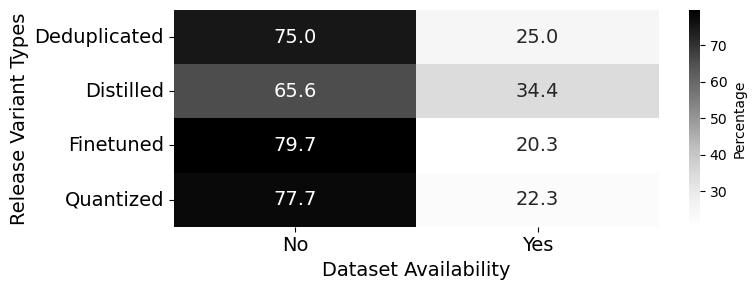

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

df_wo_deletes = df_main[(df_main["Upload Date"] != 'deleted') & (df_main["merge_prime"] != 'None')]

df_wo_deletes['merge_prime'] = df_wo_deletes['merge_prime'].str.capitalize()
df_wo_deletes['merge_prime'].replace("Compressed", "Distilled", inplace=True)

heatmap_data = df_wo_deletes.pivot_table(index='merge_prime', columns='has_dataset', aggfunc='size', fill_value=0)

# Calculate percentages for each item in each group
percentage_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100

# Plot heatmap
plt.figure(figsize=(8, 3))
heatmap = sns.heatmap(percentage_data, annot=True, fmt=".1f", cmap="Greys", annot_kws={"fontsize":14}, cbar_kws={'label': 'Percentage'})
#plt.title('Percentage of Populations without Dataset')
plt.xlabel('Dataset Availability', fontsize=14)
plt.ylabel('Release Variant Types', fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
plt.tight_layout()  # Adjusts spacing to minimize overlaps
plt.savefig('RQ2dataset.pdf')
plt.show()

In [50]:
percentage_data

has_dataset,No,Yes
merge_prime,,
Deduplicated,75.000000,25.000000
Distilled,65.591398,34.408602
Finetuned,79.733757,20.266243
Quantized,77.657143,22.342857


/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_83409/3879103397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_deletes['merge_prime'] = df_wo_deletes['merge_prime'].str.capitalize()
/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_83409/3879103397.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_deletes['merge_prime'].replace("Compressed", "Distilled", inplace=True)
/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_83409/3879103397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

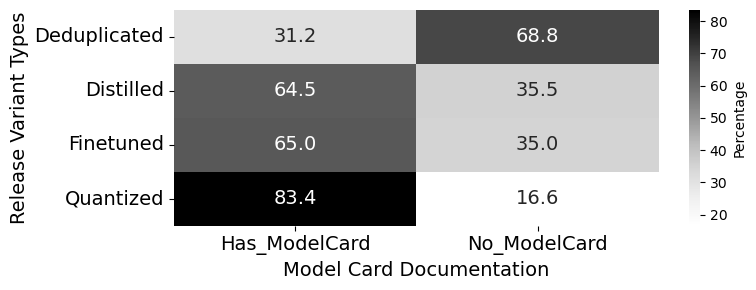

In [75]:
df_wo_deletes = df_main[(df_main["Upload Date"] != 'deleted') & (df_main["merge_prime"] != 'None')]

#all_has_vars = for_heatmap[for_heatmap["merge_prime"] != "None"]

df_wo_deletes['merge_prime'] = df_wo_deletes['merge_prime'].str.capitalize()
df_wo_deletes['merge_prime'].replace("Compressed", "Distilled", inplace=True)
df_wo_deletes['model_card'].replace({"card_found": "Has_ModelCard", "no_card": "No_ModelCard"}, inplace=True)

heatmap_data_modelCard = df_wo_deletes.pivot_table(index='merge_prime', columns='model_card', aggfunc='size', fill_value=0)

# Calculate percentages for each item in each group
percentage_Card = heatmap_data_modelCard.div(heatmap_data_modelCard.sum(axis=1), axis=0) * 100

# Plot heatmap
plt.figure(figsize=(8, 3))
heatmap = sns.heatmap(percentage_Card, annot=True, fmt=".1f", cmap="Greys",annot_kws={"fontsize":14}, cbar_kws={'label': 'Percentage'})
#plt.title('Percentage of Populations without Dataset')
plt.xlabel('Model Card Documentation', fontsize=14)
plt.ylabel('Release Variant Types', fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
plt.tight_layout() 
plt.savefig('RQ2modelcard.pdf')
plt.show()

In [ ]:
heatmap_data_modelCard

/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_83409/1437007422.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_deletes['merge_prime'] = df_wo_deletes['merge_prime'].str.capitalize()
/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_83409/1437007422.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_deletes['merge_prime'].replace("Compressed", "Distilled", inplace=True)
/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_83409/1437007422.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

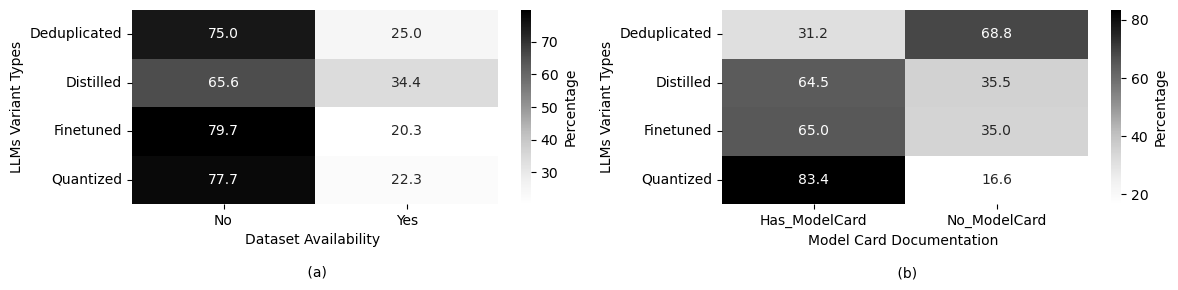

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

df_wo_deletes = df_main[(df_main["Upload Date"] != 'deleted') & (df_main["merge_prime"] != 'None')]

#all_has_vars = for_heatmap[for_heatmap["merge_prime"] != "None"]

df_wo_deletes['merge_prime'] = df_wo_deletes['merge_prime'].str.capitalize()
df_wo_deletes['merge_prime'].replace("Compressed", "Distilled", inplace=True)
df_wo_deletes['model_card'].replace({"card_found": "Has_ModelCard", "no_card": "No_ModelCard"}, inplace=True)

# Create subplot for the first heatmap
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

# Plot the first heatmap
heatmap_data = df_wo_deletes.pivot_table(index='merge_prime', columns='has_dataset', aggfunc='size', fill_value=0)
percentage_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100
sns.heatmap(percentage_data, annot=True, fmt=".1f", cmap="Greys", cbar_kws={'label': 'Percentage'}, ax=axs[0])
#axs[0].set_title('Dataset Availability')
axs[0].set_xlabel('Dataset Availability \n\n (a)')
axs[0].set_ylabel('LLMs Variant Types')
axs[0].tick_params(axis='x', rotation=0)

# Plot the second heatmap
heatmap_data_modelCard = df_wo_deletes.pivot_table(index='merge_prime', columns='model_card', aggfunc='size', fill_value=0)
percentage_Card = heatmap_data_modelCard.div(heatmap_data_modelCard.sum(axis=1), axis=0) * 100
sns.heatmap(percentage_Card, annot=True, fmt=".1f", cmap="Greys", cbar_kws={'label': 'Percentage'}, ax=axs[1])
#axs[1].set_title('Model Card Documentation')
axs[1].set_xlabel('Model Card Documentation \n\n (b)')
axs[1].set_ylabel('LLMs Variant Types')
axs[1].tick_params(axis='x', rotation=0)

# Adjust layout
plt.tight_layout()
plt.savefig('RQ2c.pdf')

# Show the subplots
plt.show()


In [34]:
df_wo_deletes

,Owner,model_name,model_link,pipeline,size,base_model,architecture,Establishment,Upload Date,Modified,...,pull_count,discussion_count,model_card,dataset,Dataset,Link_ava,has_dataset,changed_frequency,merge_prime,model_group
13,frenkd,frenkd/distilbert-base-uncased-finetuned-squad,https://huggingface.co/frenkd/distilbert-base-...,question-answering,66364418.0,distilbert,DistilBertForQuestionAnswering,individual,2024-03-14T13:26:57.000Z,2024-03-14T16:54:03.000Z,...,0,0,Has_ModelCard,no_dataset,No,No,No,28.0,Finetuned,Distilbert
17,xuerongkun,xuerongkun/distilbert-base-uncased_emotion_ft_...,https://huggingface.co/xuerongkun/distilbert-b...,text-classification,66958086.0,distilbert,DistilBertForSequenceClassification,individual,2023-12-17T10:29:24.000Z,2023-12-17T11:08:00.000Z,...,0,0,Has_ModelCard,no_dataset,No,No,No,13.0,Finetuned,Distilbert
18,hyunjerry,hyunjerry/distilbert-base-uncased-finetuned-squad,https://huggingface.co/hyunjerry/distilbert-ba...,question-answering,66364418.0,distilbert,DistilBertForQuestionAnswering,individual,2023-12-24T06:08:15.000Z,2024-01-10T16:15:26.000Z,...,0,0,Has_ModelCard,no_dataset,No,No,No,47.0,Finetuned,Distilbert
20,weihlai,weihlai/distilbert-base-uncased-finetuned-squad,https://huggingface.co/weihlai/distilbert-base...,question-answering,66364418.0,distilbert,DistilBertForQuestionAnswering,individual,2023-12-31T16:36:14.000Z,2024-01-02T17:37:47.000Z,...,0,0,Has_ModelCard,no_dataset,No,No,No,158.0,Finetuned,Distilbert
21,cicimen,cicimen/xlm-roberta-base-finetuned-panx-de,https://huggingface.co/cicimen/xlm-roberta-bas...,token-classification,277458439.0,xlm-roberta,XLMRobertaForTokenClassification,individual,2024-01-01T17:26:06.000Z,2024-01-02T20:36:57.000Z,...,0,0,Has_ModelCard,no_dataset,No,No,No,35.0,Finetuned,XLM-RoBERTa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52177,sarahmiller137,sarahmiller137/BiomedNLP-PubMedBERT-base-uncas...,https://huggingface.co/sarahmiller137/BiomedNL...,token-classification,108894467.0,bert,BertForTokenClassification,individual,2022-08-22T16:06:00.000Z,2023-03-23T15:57:02.000Z,...,1,0,Has_ModelCard,['ncbi_disease'],NaN,NaN,Yes,16.0,Finetuned,Bert
52178,sarahmiller137,sarahmiller137/BiomedNLP-PubMedBERT-base-uncas...,https://huggingface.co/sarahmiller137/BiomedNL...,token-classification,108894467.0,bert,BertForTokenClassification,individual,2022-08-22T15:28:52.000Z,2023-03-23T15:56:40.000Z,...,1,0,Has_ModelCard,['ncbi_disease'],NaN,NaN,Yes,18.0,Finetuned,Bert
52179,sarahmiller137,sarahmiller137/distilbert-base-uncased-ft-m3-lc,https://huggingface.co/sarahmiller137/distilbe...,text-classification,66955010.0,distilbert,DistilBertForSequenceClassification,individual,2022-06-30T11:05:13.000Z,2023-06-07T17:39:39.000Z,...,1,0,Has_ModelCard,['MIMIC-III'],NaN,NaN,Yes,13.0,Finetuned,Distilbert
52184,Addedk,Addedk/mbert-swedish-distilled-cased,https://huggingface.co/Addedk/mbert-swedish-di...,fill-mask,135447803.0,bert,BertForMaskedLM,individual,2022-06-15T12:22:20.000Z,2023-09-13T17:57:54.000Z,...,3,0,Has_ModelCard,['KBLab/sucx3_ner'],NaN,NaN,Yes,21.0,Distilled,Bert


In [ ]:
percentage_data

In [ ]:
has_dataset, Has_Dataset, No_Dataset
Deduplicated, 25.000000, 75.000000
Distilled, 35.897436, 64.102564
Finetuned, 21.547479, 78.452521
Quantized, 22.791575, 77.208425

In [ ]:
percentage_Card

In [ ]:
model_card, Has_ModelCard, No_ModelCard
Deduplicated, 31.250000, 68.750000
Distilled, 67.948718, 32.051282
Finetuned, 68.112544, 31.887456
Quantized, 83.841559, 16.158441


In [ ]:
for_del = df_main[df_main["Upload Date"] != 'deleted']
for_del['upload'] = pd.to_datetime(for_del['Upload Date'])
for_del['year'] = for_del['upload'].dt.year
for_del['month'] = for_del['upload'].dt.month

In [ ]:
# Replace "deleted" with NaN
df_main['Upload Date'] = df_main['Upload Date'].replace("deleted", pd.NA)

# Convert 'Upload Date' column to datetime
df_main['Upload Date'] = pd.to_datetime(df_main['Upload Date'], errors='coerce')
# Extract only the date part
df_main['Upload Date'] = df_main['Upload Date'].dt.date
df_main['model_age'] = (pd.to_datetime('now') - df_main['Upload Date']).dt.days

df_main['likes'] = pd.to_numeric(df_main['likes'], errors='coerce')

# Group by 'Owner', 'Upload Date', and 'model_card', and aggregate
dating = df_main.groupby(['Owner', 'Upload Date', 'model_card']).agg({
    'model_name': 'nunique',
    'download': 'mean',
    'likes': 'mean',
    'model_age' : 'mean'
}).reset_index()

# Rename the 'model_name' column to 'frequency'
dating.rename(columns={'model_name': 'frequency'}, inplace=True)

# Filter rows where frequency is greater than 1
result = dating[dating['frequency'] > 1]

# Print the resulting DataFrame
result

In [ ]:
# Replace "deleted" with NaN
df_main['Upload Date'] = df_main['Upload Date'].replace("deleted", pd.NA)

# Convert 'Upload Date' column to datetime
df_main['Upload Date'] = pd.to_datetime(df_main['Upload Date'], errors='coerce')
# Extract only the date part
df_main['Upload Date'] = df_main['Upload Date'].dt.date

df_main['likes'] = pd.to_numeric(df_main['likes'], errors='coerce')

# Group by 'Owner', 'Upload Date', and 'model_card', and aggregate
dating_dataset = df_main.groupby(['Owner', 'Upload Date', 'has_dataset']).agg({
    'model_name': 'nunique',
    'download': 'mean',
    'likes': 'mean'
}).reset_index()

# Rename the 'model_name' column to 'frequency'
dating_dataset.rename(columns={'model_name': 'frequency'}, inplace=True)

# Filter rows where frequency is greater than 1
result_dataset = dating_dataset[dating_dataset['frequency'] > 1]

# Print the resulting DataFrame
result_dataset

In [ ]:
mean_model_card = result.groupby('model_card')['download'].mean()
mean_model_card

In [ ]:
mean_dataset = result_dataset.groupby('has_dataset')['download'].mean()
mean_dataset

In [ ]:
result

In [ ]:
import pandas as pd
import statsmodels.api as sm

y = (result['model_card'] == 'no_card').astype(int)

# Define the independent variable (predictor)
X = sm.add_constant(result['frequency'])

# Fit logistic regression model
model = sm.Logit(y, X)
results = model.fit()

# Print model summary
print(results.summary())

In [ ]:
import pandas as pd
import statsmodels.api as sm

y = (result['model_card'] == 'card_found').astype(int)

# Define the independent variable (predictor)
X = sm.add_constant(result['frequency'])

# Fit logistic regression model
model = sm.Logit(y, X)
results = model.fit()

# Print model summary
print(results.summary())

In [ ]:
y

In [ ]:
import pandas as pd

# Assuming 'to_use' DataFrame already exists
to_use = has_variant[['Owner', 'model_name', 'has_dataset', 'merge_prime', 'model_card']]

# Create new columns based on 'merge_prime' values
to_use['Finetuned'] = to_use['merge_prime'].apply(lambda x: 1 if x == 'finetuned' else 0)
to_use['Distilled'] = to_use['merge_prime'].apply(lambda x: 1 if x == 'compressed' else 0)
to_use['Deduped'] = to_use['merge_prime'].apply(lambda x: 1 if x == 'deduplicated' else 0)
to_use['Quantized'] = to_use['merge_prime'].apply(lambda x: 1 if x == 'quantized' else 0)
to_use['Dataset'] = to_use['has_dataset'].apply(lambda x: 1 if x == 'Yes' else 0)
to_use['Model Card'] = to_use['model_card'].apply(lambda x: 1 if x == 'card_found' else 0)

# Print the DataFrame
to_use

In [ ]:
from scipy.stats import chi2_contingency

# Assuming 'to_use' DataFrame already exists with the columns 'finetuning', 'compressed', 'deduplicated', 'quantized', and 'has_DT'

# Create a contingency table
contingency_table = pd.crosstab(to_use['Finetuned'], to_use['Dataset'])

# Perform chi-square test for 'finetuning' vs 'has_DT'
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test for 'Finetuned Models' vs 'Dataset':")
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)
print()

# Repeat for other combinations: 'compressed' vs 'has_DT', 'deduplicated' vs 'has_DT', and 'quantized' vs 'has_DT'

# Perform chi-square test for 'compressed' vs 'has_DT'
contingency_table = pd.crosstab(to_use['Distilled'], to_use['Dataset'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test for 'Distilled Models' vs 'Dataset':")
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)
print()

# Perform chi-square test for 'deduplicated' vs 'has_DT'
contingency_table = pd.crosstab(to_use['Deduped'], to_use['Dataset'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test for 'Deduped Model' vs 'Dataset':")
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)
print()

# Perform chi-square test for 'quantized' vs 'has_DT'
contingency_table = pd.crosstab(to_use['Quantized'], to_use['Dataset'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test for 'Quantized Model' vs 'dataset':")
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)


In [ ]:
from scipy.stats import chi2_contingency

# Assuming 'to_use' DataFrame already exists with the columns 'finetuning', 'compressed', 'deduplicated', 'quantized', and 'has_DT'

# Create a contingency table
contingency_table = pd.crosstab(to_use['Finetuned'], to_use['Model Card'])

# Perform chi-square test for 'finetuning' vs 'has_DT'
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test for 'Finetuned Models' vs 'Model Card':")
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)
print()

# Repeat for other combinations: 'compressed' vs 'has_DT', 'deduplicated' vs 'has_DT', and 'quantized' vs 'has_DT'

# Perform chi-square test for 'compressed' vs 'has_DT'
contingency_table = pd.crosstab(to_use['Distilled'], to_use['Model Card'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test for 'Distilled Models' vs 'Model Card':")
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)
print()

# Perform chi-square test for 'deduplicated' vs 'has_DT'
contingency_table = pd.crosstab(to_use['Deduped'], to_use['Model Card'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test for 'Deduped Model' vs 'Model Card':")
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)
print()

# Perform chi-square test for 'quantized' vs 'has_DT'
contingency_table = pd.crosstab(to_use['Quantized'], to_use['Model Card'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test for 'Quantized Model' vs 'Model Card':")
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)


In [ ]:
import requests
from bs4 import BeautifulSoup

# Define the model repository URL
repo_url = "https://huggingface.co/RifsxD/DialoGPT-medium-raifu"

def is_model_card_empty(repo_url):
    # Send a GET request to the repository URL
    response = requests.get(repo_url)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        # Find the model card content based on its class
        model_card_content = soup.find('div', class_='model-card-content')
        # If the model card content exists, the model card is not empty; otherwise, it's empty
        return model_card_content is None
    else:
        print(f"Failed to retrieve repository page from URL: {repo_url}")
        return None

# Check if the model card is empty
if is_model_card_empty(repo_url):
    print("The model card is empty.")
else:
    print("The model card is not empty.")


In [ ]:
df_main